In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import visionloader as vl
import os
import electrode_map as elcmp
from scipy.io import loadmat
import src.multielec_utils as mutils

%load_ext autoreload
%autoreload 2

In [2]:
datapath = "/Volumes/Analysis/2021-05-27-0/kilosort_data001/data001"
datarun = "data001"
vcd = vl.load_vision_data(
    datapath,
    datarun,
    include_neurons=True,
    include_ei=True,
    include_params=True,
    include_noise=True,
)

In [26]:
p = 2
electrical_path = "/Volumes/Analysis/2021-05-27-0/data005/data005-all/"

stim_electrodes = mutils.get_stim_elecs_newlv(electrical_path, p)

In [27]:
channel_noise = vcd.channel_noise

(array([  7.,   0.,   0.,   0.,   6., 323., 165.,  16.,   1.,   1.]),
 array([0.        , 0.50281134, 1.00562267, 1.50843401, 2.01124535,
        2.51405669, 3.01686802, 3.51967936, 4.0224907 , 4.52530204,
        5.02811337]),
 <BarContainer object of 10 artists>)

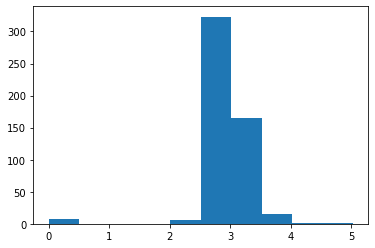

In [28]:
plt.hist(channel_noise)

In [29]:
cellids = sorted(vcd.get_cell_ids())
coords = vcd.get_electrode_map()

In [30]:
for cell in cellids:
    print(cell)
    print(vcd.get_cell_type_for_cell(cell))

1
crap
3
OFF parasol
6
ON parasol
11
OFF parasol
12
crap
14
ON parasol
15
OFF midget
16
ON parasol
18
ON parasol
19
OFF parasol
21
crap
22
crap
23
badEIs
25
ON parasol
26
ON midget
27
OFF parasol
28
ON midget
29
OFF parasol
30
OFF parasol
32
badEIs
33
OFF midget
37
OFF parasol
38
ON parasol
40
ON parasol
41
crap
44
weak
45
weak
46
ON parasol
48
badEIs
49
ON parasol
51
crap
52
off array
56
crap
58
badEIs
59
crap
62
crap
63
OFF parasol
64
ON parasol
67
OFF parasol
68
OFF parasol
69
OFF parasol
71
ON parasol
72
OFF parasol
73
OFF parasol
76
ON parasol
79
crap
80
crap
81
ON parasol
83
ON parasol
85
crap
87
OFF parasol
88
OFF parasol
89
OFF parasol
90
ON parasol
92
badEIs
93
OFF parasol
94
ON parasol
95
OFF midget
97
crap
98
OFF midget
104
badEIs
105
crap
106
crap
107
ON parasol
114
crap
115
crap
116
weak nc1
117
weak
118
weak nc1
121
OFF parasol
122
OFF midget
124
crap
127
weak nc1
128
badEIs
132
ON parasol
133
weak
135
OFF midget
136
badEIs
137
weak nc1
138
crap
139
ON parasol
141
OFF par

In [31]:
len(cellids)

696

In [37]:
thr_factor = 1

In [38]:
cells_of_interest = []
cell_types_of_interest = []

for cell in cellids:
    good_inds, EI = mutils.get_collapsed_ei_thr(vcd, cell, thr_factor)
    good_elecs = good_inds + 1
    if np.any(np.in1d(stim_electrodes, good_elecs)):
        cell_type = vcd.get_cell_type_for_cell(cell)
        if "parasol" in cell_type.lower() or 'midget' in cell_type.lower():
            print(cell)
            print(vcd.get_cell_type_for_cell(cell))
            cells_of_interest.append(cell)
            cell_types_of_interest.append(cell_type)

cells_of_interest = np.array(cells_of_interest)

562
OFF parasol
563
ON parasol
567
ON parasol
582
ON parasol
588
OFF parasol
593
OFF parasol
595
ON parasol
598
ON parasol
600
ON midget
602
OFF parasol
603
OFF parasol
609
OFF parasol
616
OFF parasol
634
OFF midget
647
ON midget
649
ON parasol
663
ON parasol
664
ON parasol
665
ON parasol
667
ON parasol
918
OFF parasol
925
OFF midget
927
ON midget
931
OFF parasol
933
OFF midget
1033
OFF midget
1084
ON parasol


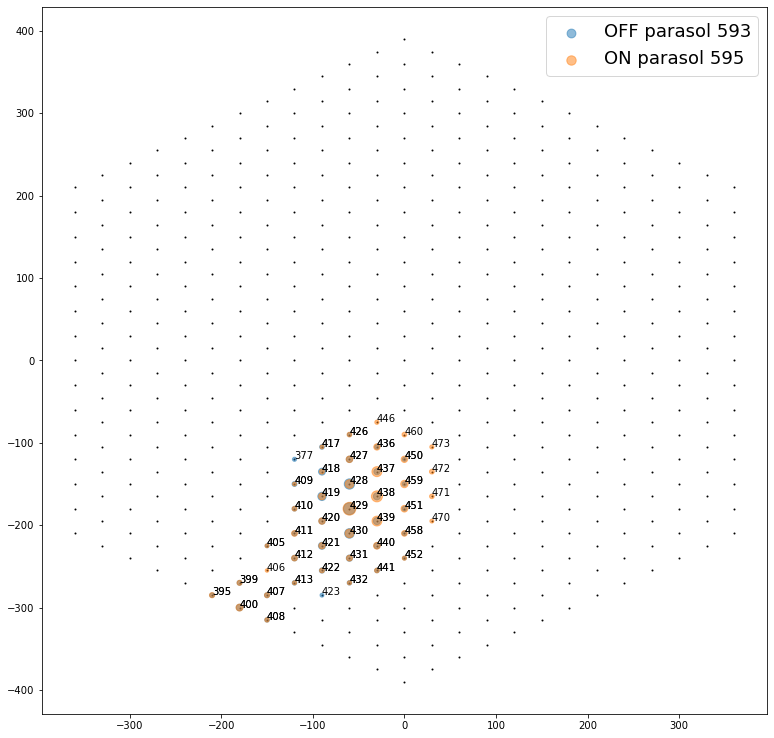

In [39]:
fig, ax = plt.subplots(figsize=(13, 13))
ax.scatter(coords[:, 0], coords[:, 1], s=1, c="k")

for j in range(len(cells_of_interest)):
    #     if True:
    if cells_of_interest[j] == 593 or cells_of_interest[j] == 595:
        good_inds, EI = mutils.get_collapsed_ei_thr(vcd, cells_of_interest[j], thr_factor)

        ax.scatter(
            coords[good_inds, 0],
            coords[good_inds, 1],
            s=EI[good_inds] * 5,
            label=cell_types_of_interest[j] + " " + str(cells_of_interest[j]),
            alpha=0.5,
        )
        for i, txt in enumerate(good_inds):
            ax.annotate(txt + 1, (coords[good_inds[i], 0], coords[good_inds[i], 1]))

# ax.axis('off')
ax.legend(fontsize=18, loc="upper right")
plt.show()

In [40]:
stim_electrodes

array([429, 439, 438], dtype=uint16)